# NASA ASTEROID DETECTION ALGORITHM

Import Libraries and Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


Loading and Exploring the Data

In [60]:
a=pd.read_csv('neo.csv')

In [61]:
a.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [59]:
# how many records?
print(len(a))

# how many attributes?
a.columns

90836


Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [58]:
print(a.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [56]:
a[a['id'] == 2512244]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
2,2512244,512244 (2015 YE18),0.72203,1.614507,114258.692129,4.979872e+07,17.83,False
34775,2512244,512244 (2015 YE18),0.72203,1.614507,108921.901046,5.515533e+07,17.83,False
38935,2512244,512244 (2015 YE18),0.72203,1.614507,83443.665419,3.847137e+07,17.83,False
50557,2512244,512244 (2015 YE18),0.72203,1.614507,66703.445868,4.261211e+07,17.83,False
56163,2512244,512244 (2015 YE18),0.72203,1.614507,92356.589391,2.215708e+07,17.83,False
59222,2512244,512244 (2015 YE18),0.72203,1.614507,75905.795982,6.279431e+07,17.83,False
75891,2512244,512244 (2015 YE18),0.72203,1.614507,125222.235862,6.461806e+07,17.83,False


In [55]:
a.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


Heatmap

<AxesSubplot:>

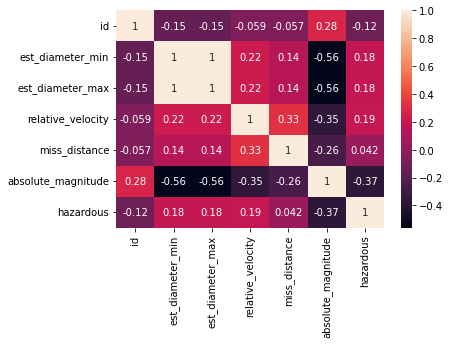

In [54]:
sns.heatmap(a.corr(),annot=True)

Model Building and Predictions

In [62]:
# Create dataframes for predictor and target variables
X = a.drop(["id","name","hazardous"], axis=1)
y = a.hazardous.astype(int)

# Test train split 80/20, stratify y due to class imbalance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn import tree 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

**Variable Scaling**

In [ ]:
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled=pd.DataFrame(sc.transform(X_test))

**Decision Tree Model**

In [35]:
# Create decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [42]:
predictions=clf.predict(X_test_scaled)
metrics.accuracy_score(predictions,y_test)*100

89.34940554821664

The Precision of this model is 89.34 percent 

<AxesSubplot:title={'center':'Variable Importance for Decision Tree'}>

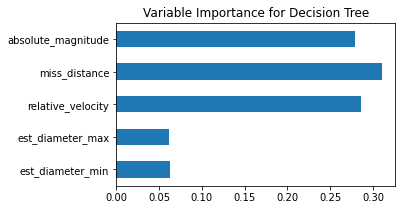

In [43]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh', title='Variable Importance for Decision Tree',figsize=[5,3])

The featurewise distribution of values shows us the importance of each feature in contributing to our classification model.

**K Nearest Neighbours**

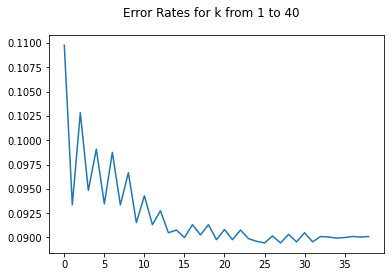

In [48]:
# Hyperparameter tuning for k
error_rates = []
for i in np.arange(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    error_rates.append(np.mean(predictions != y_test))

plt.rcParams['figure.figsize']=[6,4]
plt.suptitle('Error Rates for k from 1 to 40')
plt.plot(error_rates)

In [47]:
metrics.accuracy_score(predictions,y_test)*100

90.98965213562307

The Accuracy score of K nearest Neigbours comes down to about 90.98 or 91(Rounding Off)

**Random Forest Classifier**

In [49]:
# Create model
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
RF_pred = RF.predict(X_test_scaled)

In [52]:
metrics.accuracy_score(RF_pred,y_test)*100

91.94738000880669

The Accuracy Score for Random Forest Classifier is the Highest among the three : 91.94 